In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import reuters 

# load and split data into training set and test set
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


2113536/2110848 [==============================] - 23s 11us/step


In [2]:
#exploring data
print(f'training set : {train_data.shape}')
print(f'test set: {test_data.shape}')
print('training set example')
print(train_data[0])
      

training set : (8982,)
test set: (2246,)
training set example
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [3]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

557056/550378 [==============================] - 1s 2us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [4]:
#preparing the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i,sequence] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

print(f'x_train sample : {x_train[0]}')
print(f'x_test sample : {x_test[0]}')
    

x_train sample : [0. 1. 1. ... 0. 0. 0.]
x_test sample : [0. 1. 1. ... 0. 0. 0.]


In [5]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i,label in enumerate(labels):
        results[i,label] = 1
    return results

# built in keras function for one-hot encoding
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

print(f'one_hot_train_labels sample : {one_hot_train_labels[0]}')

one_hot_train_labels sample : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
#Building the network
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [8]:
#Validating our approach
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
history = model.fit(partial_x_train, partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))


Epoch 1/20
16/16 [==============================] - 1s 58ms/step - loss: 2.6241 - accuracy: 0.5355 - val_loss: 1.7722 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 0s 31ms/step - loss: 1.4285 - accuracy: 0.7126 - val_loss: 1.3078 - val_accuracy: 0.7090
Epoch 3/20
16/16 [==============================] - 0s 28ms/step - loss: 1.0592 - accuracy: 0.7711 - val_loss: 1.1382 - val_accuracy: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 22ms/step - loss: 0.8392 - accuracy: 0.8166 - val_loss: 1.0388 - val_accuracy: 0.7740
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.6709 - accuracy: 0.8587 - val_loss: 0.9654 - val_accuracy: 0.8010
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.5411 - accuracy: 0.8856 - val_loss: 0.9227 - val_accuracy: 0.8060
Epoch 7/20
16/16 [==============================] - 0s 23ms/step - loss: 0.4381 - accuracy: 0.9090 - val_loss: 0.8989 - val_accuracy: 0.8170
Epoch 8/20
16

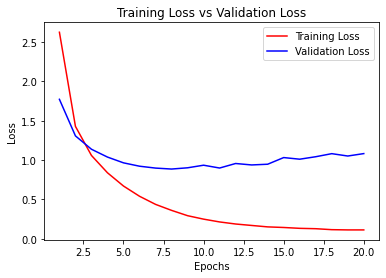

In [10]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training Loss vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,partial_y_train, epochs=9,batch_size=512,validation_data=(x_val,y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 0s 30ms/step - loss: 2.5826 - accuracy: 0.5415 - val_loss: 1.7082 - val_accuracy: 0.6630
Epoch 2/9
16/16 [==============================] - 0s 22ms/step - loss: 1.3936 - accuracy: 0.7182 - val_loss: 1.3002 - val_accuracy: 0.7130
Epoch 3/9
16/16 [==============================] - 0s 23ms/step - loss: 1.0232 - accuracy: 0.7869 - val_loss: 1.1314 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 0s 23ms/step - loss: 0.8054 - accuracy: 0.8329 - val_loss: 1.0420 - val_accuracy: 0.7870
Epoch 5/9
16/16 [==============================] - 0s 24ms/step - loss: 0.6362 - accuracy: 0.8686 - val_loss: 0.9804 - val_accuracy: 0.8090
Epoch 6/9
16/16 [==============================] - 0s 24ms/step - loss: 0.5089 - accuracy: 0.8943 - val_loss: 0.9435 - val_accuracy: 0.8080
Epoch 7/9
16/16 [==============================] - 0s 24ms/step - loss: 0.4079 - accuracy: 0.9157 - val_loss: 0.9337 - val_accuracy: 0.7980
Epoch 8/9
16/16 [===